In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import read_qdp
import os
import sys

from sklearn.manifold import TSNE

In [2]:
def create_training_data(dirname):
    series = []
    for filename in os.listdir(dirname):
        if filename.endswith(".qdp"):
            print(filename)
            qdp = read_qdp.read_qdp(dirname+ '\\' +filename)
            new1 = qdp.iloc[:,0]
            new2 = qdp.iloc[:,1]
            series.append((pd.concat([new1,new2], axis=1), filename))
        elif filename.endswith(".xls") or  filename.endswith(".xlxs"):
            dataDict = pd.read_excel(dirname + '\\' + filename, sheet_name=None)
            for name, sheet in dataDict.items():
                new1 = sheet.iloc[:,0]
                new2 = sheet.iloc[:,1]
                series.append((pd.concat([new1,new2], axis=1), name))
            
    return series

In [3]:
data = create_training_data(r'C:\Users\callu\Dropbox\University\Year 3\Block 2b\Project\Data')

IV17DShutterClosed_101.30mK_BB534.38K_magnet0uA_HTRV2724.70mV_HTRI26.74mA_PBB0pc.qdp
IV17DShutterClosed_106.36mK_BB534.38K_magnet0uA_HTRV4551.40mV_HTRI45.61mA_PBB0pc.qdp
IV17DShutterClosed_111.63mK_BB534.38K_magnet0uA_HTRV4811.50mV_HTRI48.28mA_PBB0pc.qdp
IV17DShutterClosed_114.44mK_BB534.38K_magnet0uA_HTRV4968.60mV_HTRI49.87mA_PBB0pc.qdp
IV17DShutterClosed_116.48mK_BB534.38K_magnet0uA_HTRV5041.70mV_HTRI50.83mA_PBB0pc.qdp
IV17DShutterClosed_126.38mK_BB3.37K_magnet0uA_HTRV5560.90mV_HTRI56.08mA_PBB0pc.qdp
IV17DShutterClosed_132.10mK_BB3.36K_magnet0uA_HTRV5812.10mV_HTRI58.57mA_PBB0pc.qdp
IV17DShutterClosed_40.65mK_BB534.38K_magnet0uA_HTRV0.00mV_HTRI0.00mA_PBB0pc.qdp
IV17DShutterClosed_49.81mK_BB534.38K_magnet0uA_HTRV1389.70mV_HTRI13.64mA_PBB0pc.qdp
IV17DShutterClosed_59.96mK_BB534.38K_magnet0uA_HTRV2121.30mV_HTRI20.80mA_PBB0pc.qdp
IV17DShutterClosed_70.07mK_BB3.36K_magnet0uA_HTRV2636.70mV_HTRI26.19mA_PBB0pc.qdp
IV17DShutterClosed_70.31mK_BB3.36K_magnet0uA_HTRV2642.40mV_HTRI26.26mA_PBB0pc.q

In [4]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

def extract_features(data_set):
    rows_list = []
    for data in data_set:
        data_dict = {}
        rawI = (data[0].iloc[:,0].dropna()).values #Store as individual np.arrays for more readable code
        rawV = (data[0].iloc[:,1].dropna()).values
        try:
            raw_grad = np.gradient(rawV, rawI)



            turns = 0
            for i in range(len(raw_grad)-1):
                if raw_grad[i] * raw_grad[i+1] < 0:
                    turns += 1

            data_dict['double_sided'] = 0.8*abs(np.min(rawI)) < np.max(rawI) < 1.2*abs(np.min(rawI))       
            #data_dict['V_range'] = (np.max(rawV) * np.min(rawV)) > 0 
            #data_dict['I_range'] = (np.max(rawI) * np.min(rawI)) < 0 
            data_dict['super'] = np.max(raw_grad) > 2*np.sum(raw_grad[:10])/10
            data_dict['trans'] = np.min(raw_grad) < 0       
            data_dict['turns'] = turns
            data_dict['noise'] = np.std(raw_grad)
            

            rows_list.append(data_dict)
        except:
            pass
        i+=1
    df =  pd.DataFrame(rows_list) 
    df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna()
    df = df.reset_index()
    return clean_dataset(df)

        

In [200]:
data

[(           bias  V fb (V)
  0   -111.991719 -0.546705
  1   -111.007737 -0.543079
  2   -110.005533 -0.539278
  3   -109.003329 -0.535341
  4   -108.001126 -0.531625
  5   -106.998922 -0.527790
  6   -105.996718 -0.524079
  7   -104.994514 -0.520450
  8   -103.992311 -0.516628
  9   -103.008329 -0.512905
  10  -102.006125 -0.509426
  11  -101.003921 -0.505485
  12  -100.001717 -0.501909
  13   -98.999513 -0.498527
  14   -97.997310 -0.495138
  15   -96.995106 -0.491353
  16   -95.992902 -0.488138
  17   -95.008920 -0.484978
  18   -94.006716 -0.482094
  19   -93.004512 -0.479234
  20   -92.002309 -0.476547
  21   -91.000105 -0.474303
  22   -89.997901 -0.474068
  23   -88.995697 -0.477095
  24   -87.993494 -0.479211
  25   -86.991290 -0.483191
  26   -86.007308 -0.485888
  27   -85.005104 -0.489790
  28   -84.002900 -0.493751
  29   -83.000696 -0.497940
  ..          ...       ...
  97    84.002900  0.474925
  98    85.005104  0.470868
  99    86.007308  0.467231
  100   86.991290  0

In [5]:
df = extract_features(data)

C:\Users\callu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1003: RuntimeWarning: divide by zero encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
C:\Users\callu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1003: RuntimeWarning: invalid value encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
C:\Users\callu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1004: RuntimeWarning: divide by zero encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
C:\Users\callu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1004: RuntimeWarning: invalid value encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
C:\Users\callu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1005: RuntimeWarning: invalid value encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
C:\Users\callu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1011: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + 

In [6]:
df.drop(['index'], axis=1)

,double_sided,noise,super,trans,turns
0,1.0,0.036668,0.0,1.0,2.0
1,1.0,0.036710,0.0,1.0,2.0
2,1.0,0.035531,0.0,1.0,2.0
3,1.0,0.036293,0.0,1.0,2.0
4,1.0,0.036376,0.0,1.0,2.0
5,1.0,0.035654,0.0,1.0,2.0
6,1.0,0.035349,0.0,1.0,2.0
7,1.0,0.035278,0.0,1.0,2.0
8,1.0,0.035136,0.0,1.0,2.0
9,1.0,0.035129,0.0,1.0,2.0


In [7]:
df

,index,double_sided,noise,super,trans,turns
0,0.0,1.0,0.036668,0.0,1.0,2.0
1,1.0,1.0,0.036710,0.0,1.0,2.0
2,2.0,1.0,0.035531,0.0,1.0,2.0
3,3.0,1.0,0.036293,0.0,1.0,2.0
4,4.0,1.0,0.036376,0.0,1.0,2.0
5,5.0,1.0,0.035654,0.0,1.0,2.0
6,6.0,1.0,0.035349,0.0,1.0,2.0
7,7.0,1.0,0.035278,0.0,1.0,2.0
8,8.0,1.0,0.035136,0.0,1.0,2.0
9,9.0,1.0,0.035129,0.0,1.0,2.0


In [8]:
model = KMeans(n_clusters=10)

model.fit(df.drop("index",axis=1).values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
all_predictions = model.predict(df.drop("index",axis=1).values)
print(all_predictions)
print(len(all_predictions))

[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 0 0 4 7 7 0 0 4 0 0 9 0 0 0 0 9 7
 4 0 0 0 0 5 5 5 5 5 5 5 5 0 5 0 5 0 0 9 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 9 0 0 8 4 8 8 6 8 4 8 4 8 9 8 8
 8 8 8 8 4 4 4 4 4 3 0 0 9 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 9 9 0 0 8 4 8 8 6 8 4 8 4 8 9 8 8 8 8 0 0 0 7 0
 7 7 0 7 7 7 7 7 7 7 0 7 0 7 7 7 7 7 7 0 7 7 0 7 7 7 7 0 0 0 0 7 7 7 7 0 0
 7 0 7 7 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 0 7 7 7 7 7 7 7 7 7 7 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 9 1 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 9 1 8 4 0 0 0 9 7 8 6 6 6 2 8 8 8 8 8
 4 8 4 4 4 4 4 4 4 4 4 4 4 4 7 1 1 7 7 7 0 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 9 0 0 9 0
 0 0 7 0 0 9 0 0 9 7 0 0 

In [215]:
print(all_predictions[30])

8


23.0


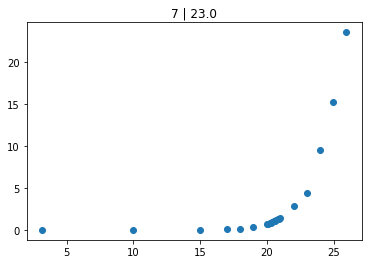

24.0


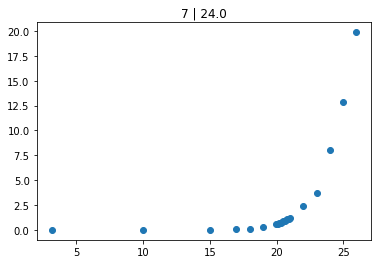

36.0


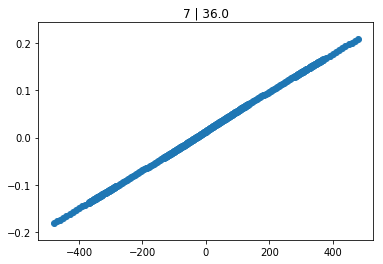

186.0


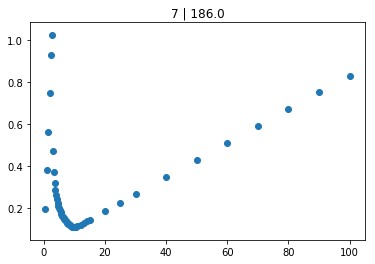

188.0


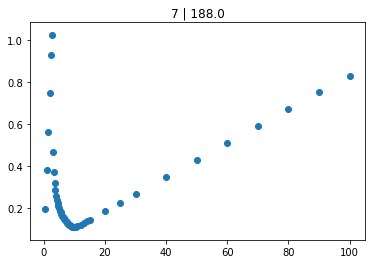

189.0


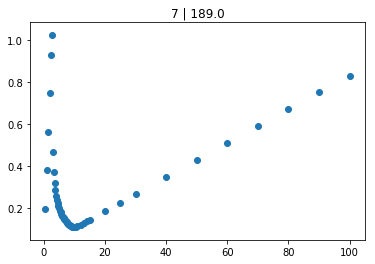

191.0


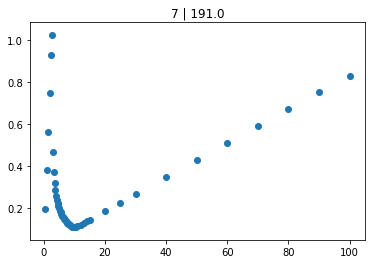

192.0


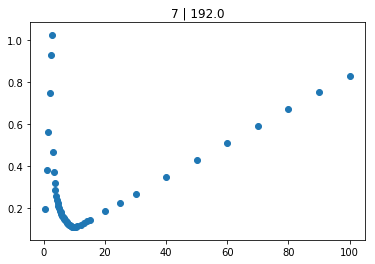

193.0


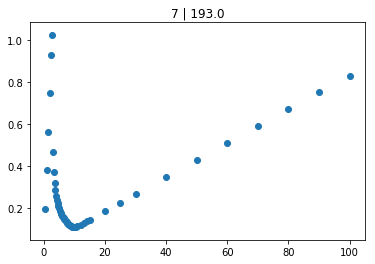

194.0


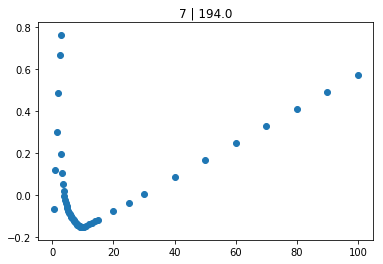

195.0


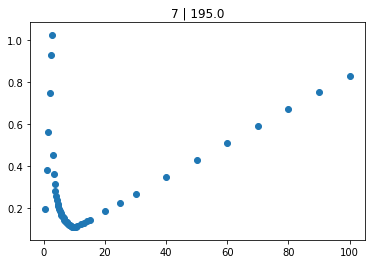

196.0


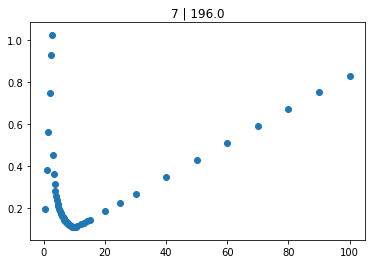

197.0


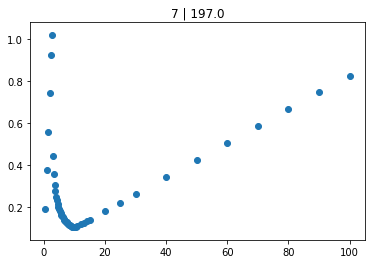

199.0


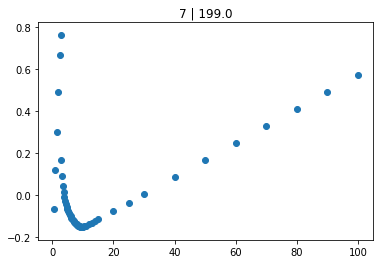

201.0


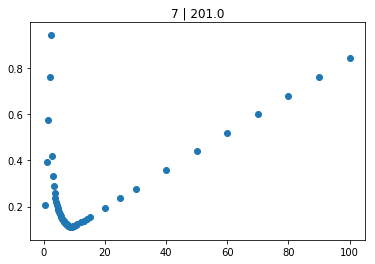

202.0


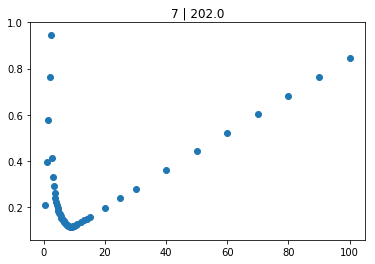

203.0


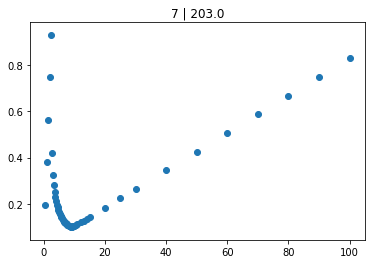

204.0


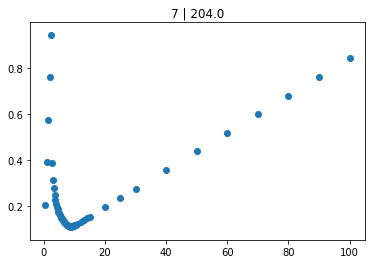

205.0


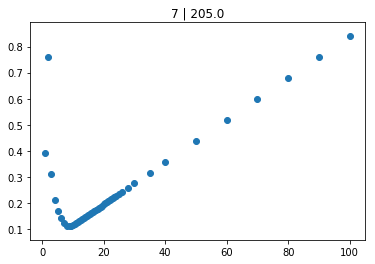

206.0


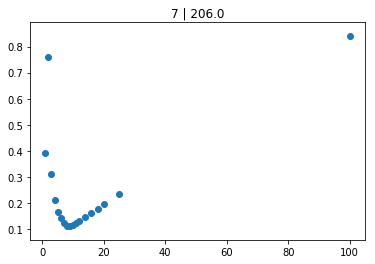

208.0


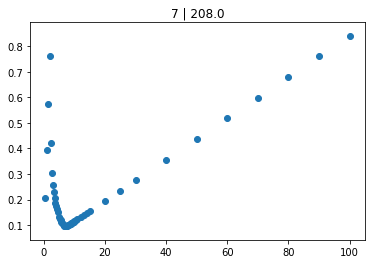

209.0


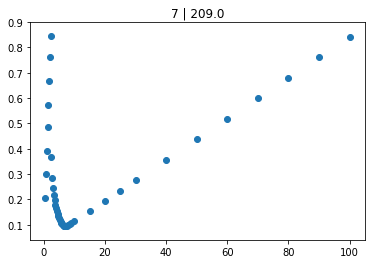

211.0


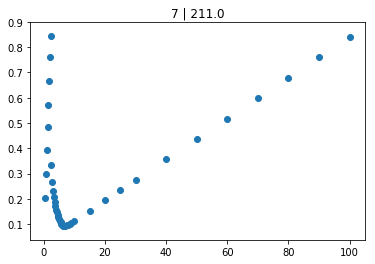

212.0


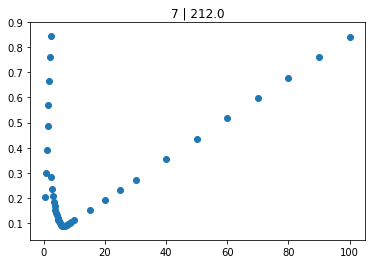

213.0


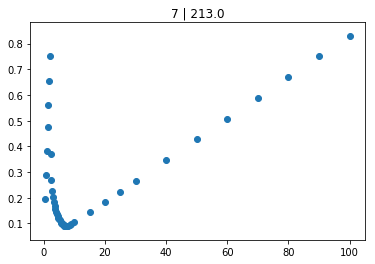

214.0


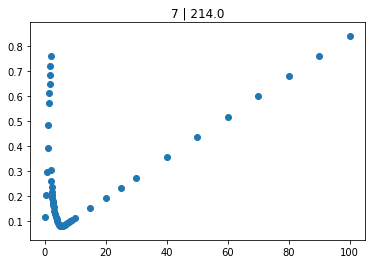

219.0


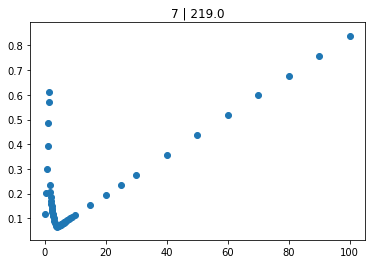

220.0


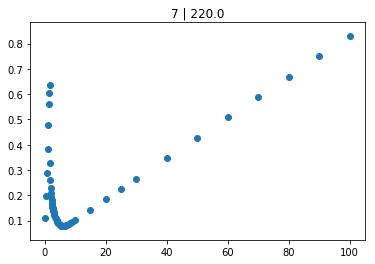

221.0


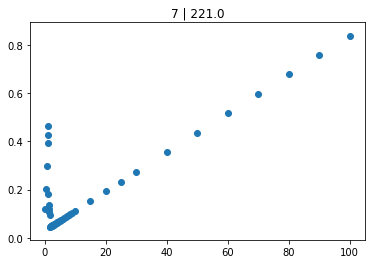

222.0


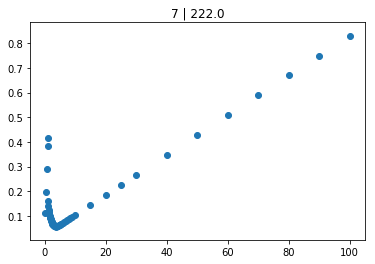

225.0


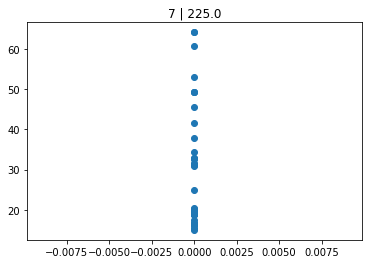

227.0


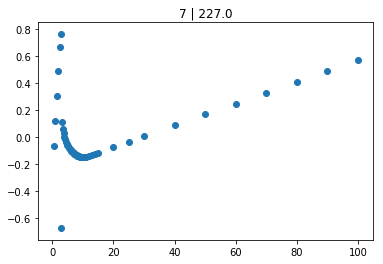

228.0


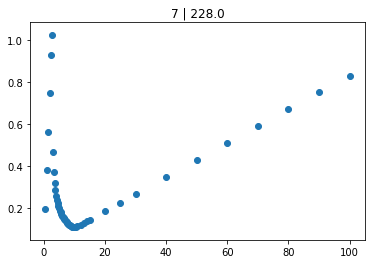

230.0


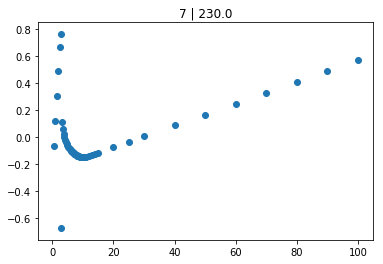

231.0


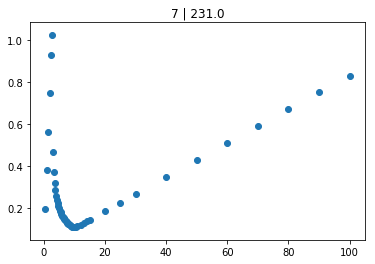

232.0


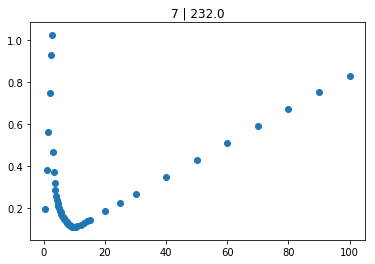

233.0


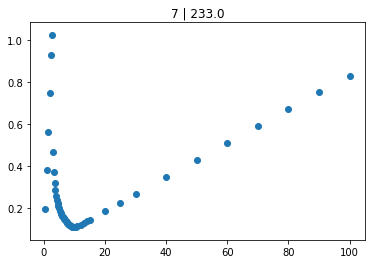

234.0


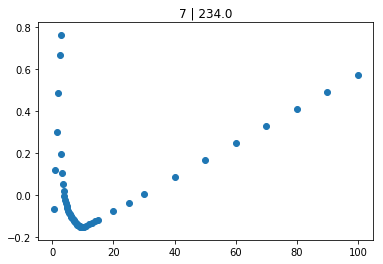

235.0


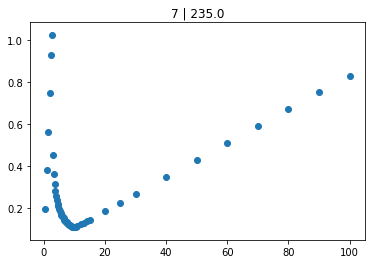

236.0


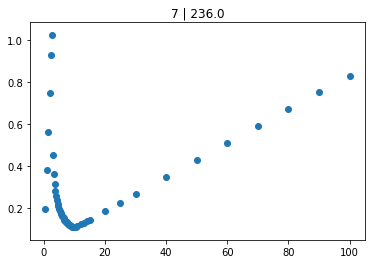

237.0


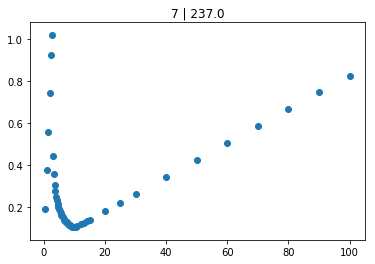

238.0


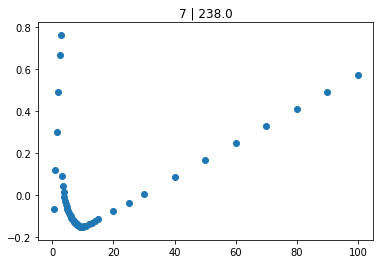

239.0


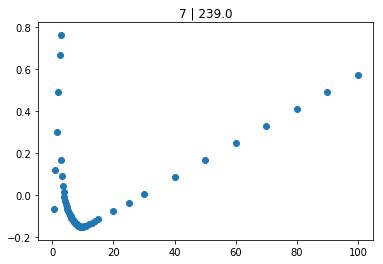

240.0


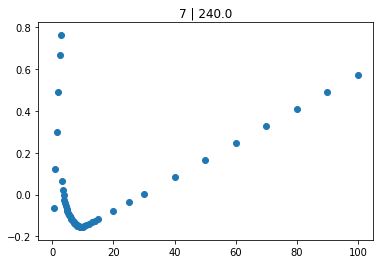

241.0


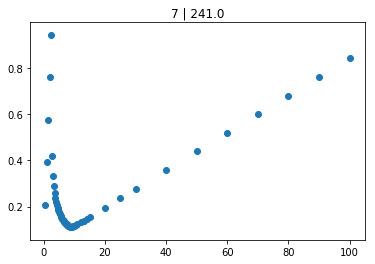

242.0


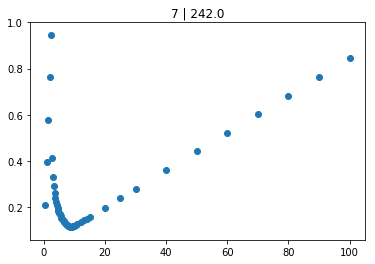

243.0


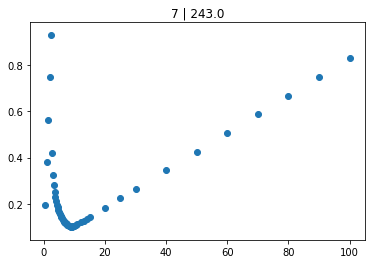

244.0


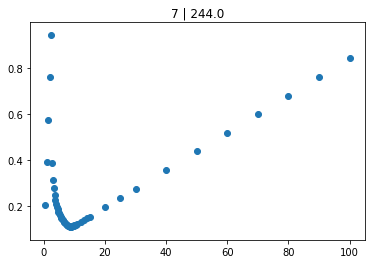

245.0


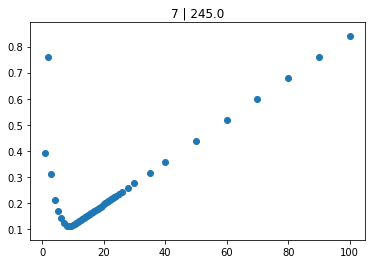

246.0


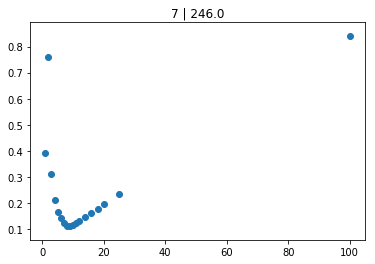

247.0


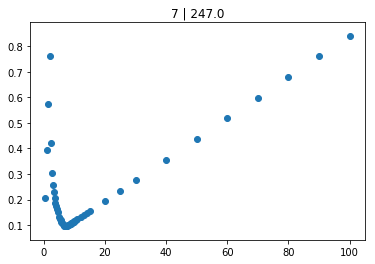

249.0


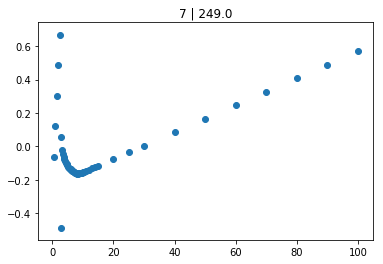

250.0


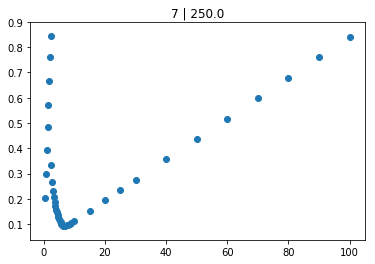

251.0


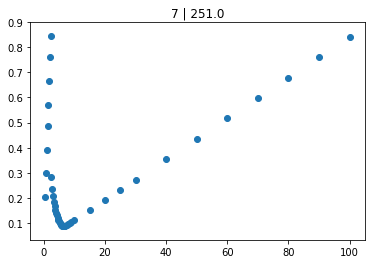

252.0


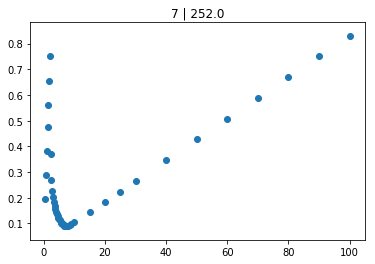

253.0


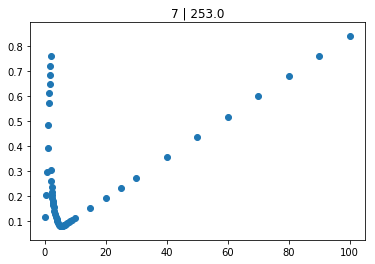

254.0


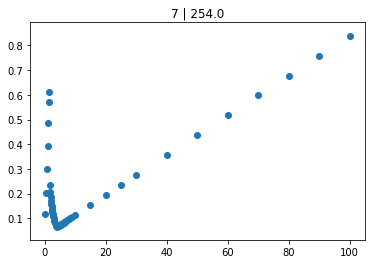

255.0


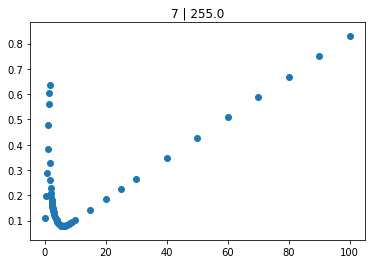

256.0


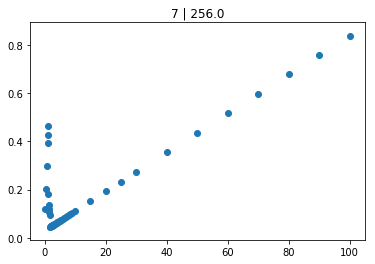

257.0


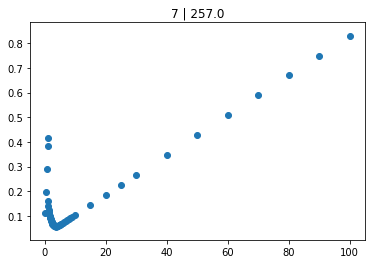

258.0


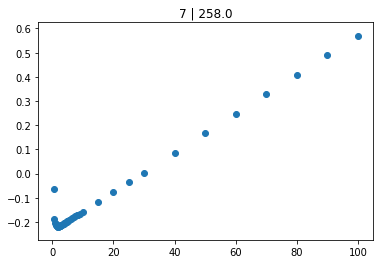

404.0


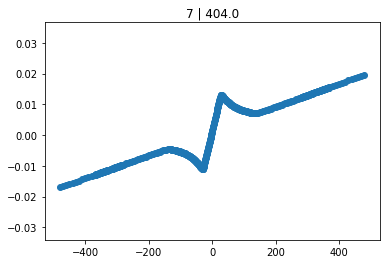

429.0


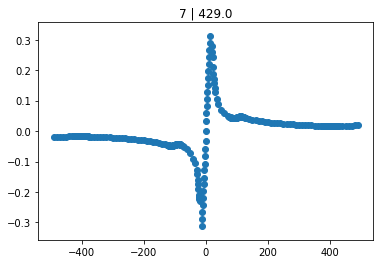

432.0


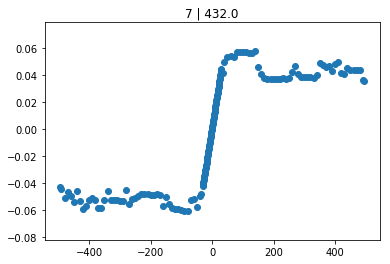

433.0


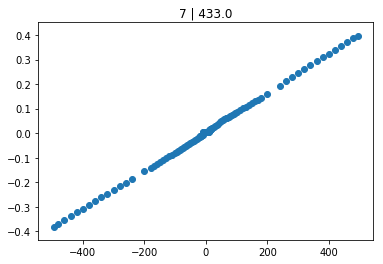

434.0


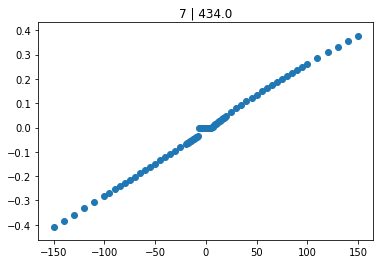

461.0


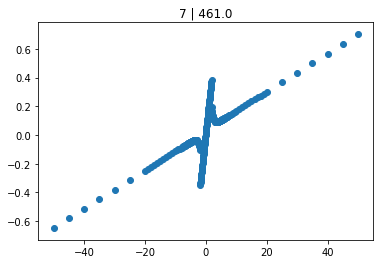

477.0


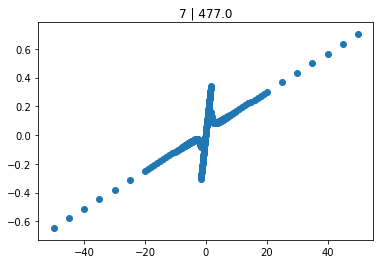

491.0


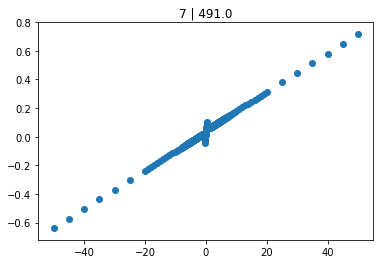

498.0


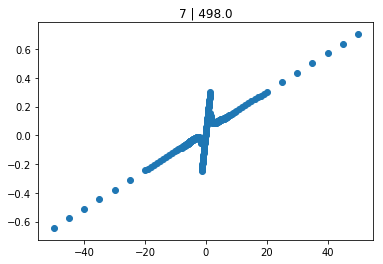

502.0


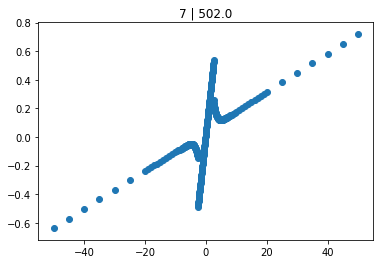

509.0


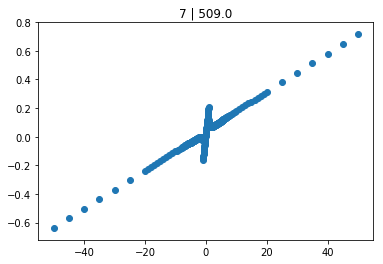

510.0


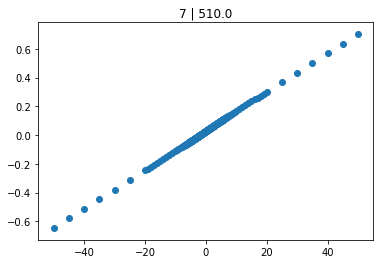

514.0


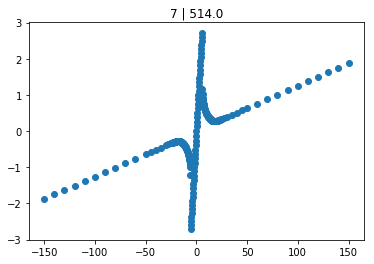

In [12]:
for index, row in df.iterrows():
    if all_predictions[index] == 7:
        print((row['index']))
        plt.scatter(data[int(row['index'])][0].iloc[:,0], data[int(row['index'])][0].iloc[:,1])

        plt.title(str(all_predictions[index]) + ' | ' + str(row['index']))
        plt.show()

In [251]:
df.loc[df['index'] == 506]

,index,double_sided,noise,super,trans,turns
498,506.0,1.0,0.424703,1.0,1.0,6.0


In [252]:
model2 = TSNE(learning_rate=100)
transformed = model2.fit_transform(df.drop("index",axis=1).values)

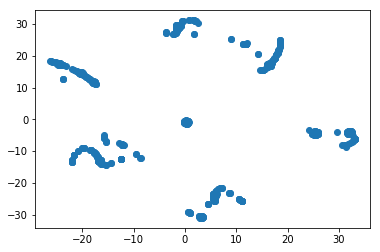

In [253]:
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis)#, c=iris_df.target)
plt.show()

In [260]:
pca = PCA(n_components=6).fit(df.values)
pca_2d = pca.transform(df.values)

In [276]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import metrics

In [337]:
db = DBSCAN(eps=1, min_samples=3)
db.fit(df.drop("index",axis=1).values)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=3, n_jobs=None, p=None)

In [338]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [339]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 11
Estimated number of noise points: 27


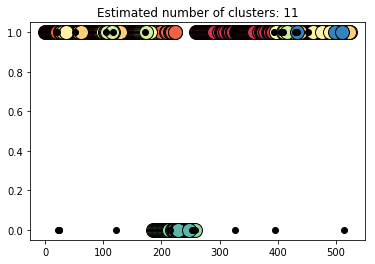

In [340]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = df.values[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = df.values[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [343]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps=0.123, min_samples = 2)
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

NameError: name 'X' is not defined